In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('data/electric_production.csv', index_col = 0) # vì hiện tại chỉ xét dataset với 1 col là giá trị, 1 col là date nên ko quan tâm đến các thứ khác (kể cả index)
df

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


<IPython.core.display.Javascript object>

In [3]:
df.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01'],
      dtype='object', name='DATE', length=956)

<IPython.core.display.Javascript object>

In [4]:
'''
dtype='object' => chuyển sang date time
'''

"\ndtype='object' => chuyển sang date time\n"

<IPython.core.display.Javascript object>

In [5]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='DATE', length=956, freq=None)

<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 1939-01-01 to 2018-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [6]:
# df.rename(columns={'IPG2211A2N': 'Energy Production'}, inplace=True)
df.columns = ['Energy Production']
df

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


<IPython.core.display.Javascript object>

In [11]:
'''
Nhìn số liệu, ta thấy những năm 1939, Energy Production khá thấp
càng về sau, việc sử dụng energy ngày càng cao (do dân số tăng, nhu cầu sản xuất, ...)
'''

'\nNhìn số liệu, ta thấy những năm 1939, Energy Production khá thấp\ncàng về sau, việc sử dụng energy ngày càng cao (do dân số tăng, nhu cầu sản xuất, ...)\n'

In [8]:
df_1985 = df[df.index.year >= 1985]
df_1985

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


<IPython.core.display.Javascript object>

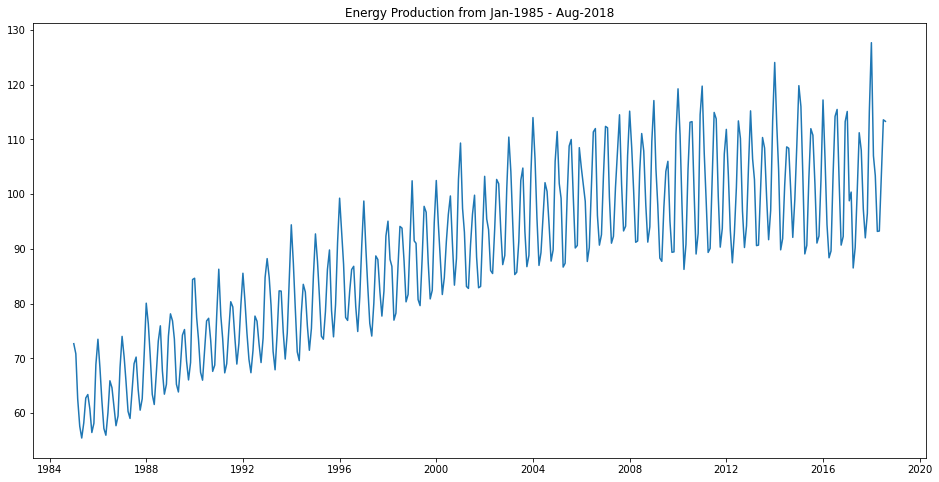

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(df_1985)
plt.title('Energy Production from Jan-1985 - Aug-2018')
plt.show()

In [18]:
'''
từ năm 1984 -> 2010 data tăng khá mạnh
tuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang 
'''

'\ntừ năm 1984 -> 2010 data tăng khá mạnh\ntuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang \n'

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# vì data có xu hướng tăng một khoảng rồi đi ngang => model='multiplicative'
# còn nếu chỉ có xu hướng tăng thì model='additive'

result = seasonal_decompose(df_1985, model='multiplicative')
result

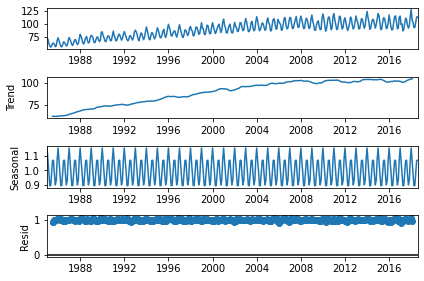

In [23]:
result.plot()
plt.show()

In [25]:
'''
Xét trend: từ năm 1984 -> 2010 data tăng khá mạnh
tuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang 

- seasonal (mùa vụ): khá đều, tăng giảm theo đúng chu kỳ của nó

'''

'\nXét trend: từ năm 1984 -> 2010 data tăng khá mạnh\ntuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang \n\n- seasonal (mùa vụ): khá đều, tăng giảm theo đúng chu kỳ của nó\n\n'

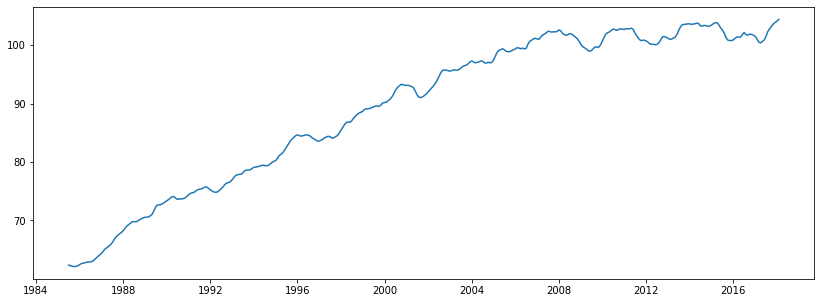

In [26]:
# xem xét yếu tố trend
plt.figure(figsize=(14, 5))
plt.plot(result.trend)
plt.show()

In [30]:
'''
Xét trend: từ năm 1984 -> 2010 data tăng khá mạnh
tuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang 
'''

'\nXét trend: từ năm 1984 -> 2010 data tăng khá mạnh\ntuy nhiên, từ 2012 - 2020, data có xu hướng đi ngang \n'

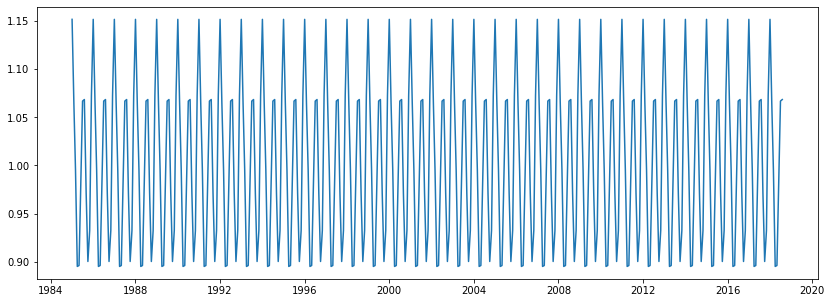

In [27]:
# xem xét yếu tố seasonal
plt.figure(figsize=(14, 5))
plt.plot(result.seasonal)
plt.show()

In [34]:
'''
- seasonal (mùa vụ): tăng giảm đều, tăng giảm theo đúng chu kỳ của nó
=> có tính mùa vụ


'''

'\n- seasonal (mùa vụ): tăng giảm đều, tăng giảm theo đúng chu kỳ của nó\n=> có tính mùa vụ\n\n\n'

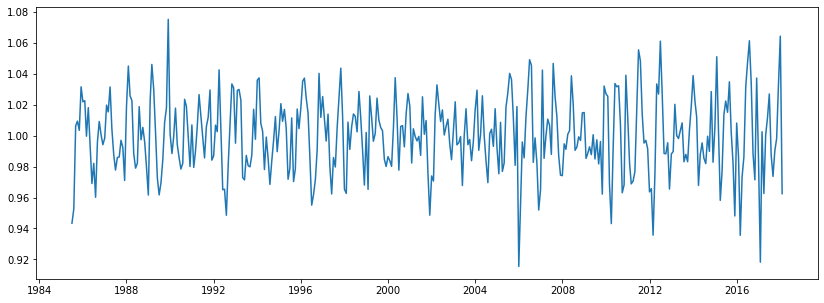

In [28]:
# xem xét yếu tố resid
plt.figure(figsize=(14, 5))
plt.plot(result.resid)
plt.show()

In [40]:
'''
resid tăng giảm bất thường, có những đột biến, có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu
nhiên và không thể đoán trước

'''

'\nresid tăng giảm bất thường, có những đột biến, có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu\nnhiên và không thể đoán trước\n\n'

### áp dụng auto_arima để xây dựng mô hình`

In [35]:
from pmdarima import auto_arima

In [36]:
#m=12 quan sát theo tháng; m = 1 theo năm, m = 7 theo tuần, ...

stepwise_model = auto_arima(df_1985, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=12, start_P=1,
                            seasonal=True, d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1827.308, Time=1.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2055.116, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1980.491, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1876.298, Time=0.25 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1826.789, Time=0.95 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1826.372, Time=2.90 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1825.064, Time=3.36 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1812.125, Time=4.34 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1815.973, Time=3.30 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1810.891, Time=3.37 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1824.617, Time=2.87 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1815.075, Time=1.96 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1827.134, Time=0.88 sec
 ARIMA(0,1,2)(2,1,2)[12]

In [38]:
# model có AIC thấp nhất là model tốt nhất là ARIMA(1,1,1)(2,1,2)[12]

In [37]:
print(stepwise_model.aic())

1809.1044498630044


### Fit model

In [9]:
# chuẩn bị dữ liệu 

# ko tách = train_test_split do nó tách random
# tách cho tròn data
train = df_1985.loc['1985-01-01':'2015-01-01'] # lấy từ 1/1985 -> 12/2014
test = df_1985.loc['2015-01-01':] # lấy từ 01/2015 đến hết

<IPython.core.display.Javascript object>

In [11]:
train.shape[0]

361

<IPython.core.display.Javascript object>

In [12]:
test.shape[0]

44

<IPython.core.display.Javascript object>

In [42]:
test.head()

,Energy Production
DATE,
2015-01-01,119.8260
2015-02-01,116.0253
2015-03-01,103.9265
2015-04-01,89.0847
2015-05-01,90.6408


In [43]:
len(test) # số mẫu trong test

44

In [50]:
'''
có 44 mẫu (44 tháng á)
'''

'\ncó 44 mẫu (44 tháng á)\n'

### Bước 2: Fit model

In [52]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

<IPython.core.display.Javascript object>

In [54]:
future_forecast = stepwise_model.predict(
    n_periods=len(test)
)  # số khoảng thời gian cần dự đoán (dùng test nên dùng luôn 44 tháng của test á)

<IPython.core.display.Javascript object>

### Bước 3: Dự đoán kết qủa

In [55]:
future_forecast = stepwise_model.predict(
    n_periods=len(test)
)  # số khoảng thời gian cần dự đoán
future_forecast

array([109.60539167, 100.70625884,  89.71135249,  92.06894151,
       103.03753609, 112.17579717, 111.30475662, 100.01379356,
        91.6640996 ,  96.12871668, 110.27753261, 118.76801384,
       108.64360686, 100.21331678,  89.9391086 ,  92.28890846,
       103.14679336, 113.09871417, 111.66336615,  99.99294381,
        91.75642723,  96.10083423, 110.79628814, 119.35702226,
       109.05568387, 101.07551613,  90.27862323,  92.55438915,
       103.04897531, 112.89399426, 111.30884792, 100.2832705 ,
        92.12161628,  97.03966197, 110.92733626, 120.15301775,
       109.73004016, 101.87582439,  90.60724447,  92.84446564,
       103.16853994, 112.74569373, 111.22366376, 100.64890829])

<IPython.core.display.Javascript object>

### Bước 4: Trực quan hóa dữ liệu

In [56]:
future_forecast = pd.DataFrame(
    future_forecast, index=test.index, columns=["Prediction"]
)
future_forecast.head()

,Prediction
DATE,
2015-01-01,109.605392
2015-02-01,100.706259
2015-03-01,89.711352
2015-04-01,92.068942
2015-05-01,103.037536


<IPython.core.display.Javascript object>

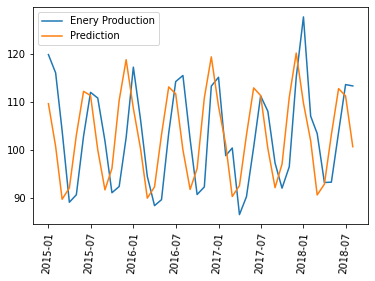

<IPython.core.display.Javascript object>

In [57]:
plt.plot(test, label="Enery Production")
plt.plot(future_forecast, label="Prediction")
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [67]:
"""
=> xu hướng dự đoán khá khớp với thực tế (test data)
tuy nhiên vẫn có lệch 1 khoảng  (thấp hơn - đường màu cam nằm dưới màu xanh)
"""

'\n=> xu hướng dự đoán khá khớp với thực tế (test data)\ntuy nhiên vẫn có lệch 1 khoảng  (thấp hơn - đường màu cam nằm dưới màu xanh)\n'

<IPython.core.display.Javascript object>

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<IPython.core.display.Javascript object>

In [61]:
mae = mean_absolute_error(test, future_forecast)
mae

8.801488821779115

<IPython.core.display.Javascript object>

In [63]:
"""
#sai số khoảng 8.8
"""

'\n#sai số khoảng 8.8\n'

<IPython.core.display.Javascript object>

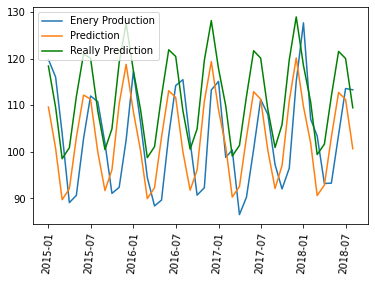

<IPython.core.display.Javascript object>

In [66]:
plt.plot(test, label="Enery Production")
plt.plot(future_forecast, label="Prediction")
plt.plot(
    future_forecast + mae, label="Really Prediction", color="green"
)  # nếu thấp hơn thì + mae, cao hơn thì tru7e2 mae
plt.xticks(rotation=85)
plt.legend()
plt.show()

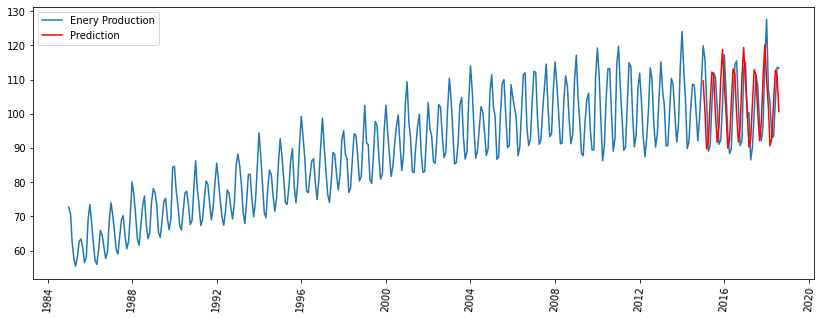

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(14, 5))
plt.plot(df_1985, label="Enery Production")
plt.plot(future_forecast, label="Prediction", color="red")
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [69]:
"""
=> kết quả dự đoán là phù hợp
"""

'\n=> kết quả dự đoán là phù hợp\n'

<IPython.core.display.Javascript object>

### dự đoán cho 12 tháng tiếp theo

In [70]:
test.tail()

,Energy Production
DATE,
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640
2018-07-01,113.5843
2018-08-01,113.3052


<IPython.core.display.Javascript object>

In [72]:
future_forecast = stepwise_model.predict(
    n_periods=len(test) + 12  # dự đoán cho 12 tháng tiếp theo
)  # số khoảng thời gian cần dự đoán
future_forecast

array([109.60539167, 100.70625884,  89.71135249,  92.06894151,
       103.03753609, 112.17579717, 111.30475662, 100.01379356,
        91.6640996 ,  96.12871668, 110.27753261, 118.76801384,
       108.64360686, 100.21331678,  89.9391086 ,  92.28890846,
       103.14679336, 113.09871417, 111.66336615,  99.99294381,
        91.75642723,  96.10083423, 110.79628814, 119.35702226,
       109.05568387, 101.07551613,  90.27862323,  92.55438915,
       103.04897531, 112.89399426, 111.30884792, 100.2832705 ,
        92.12161628,  97.03966197, 110.92733626, 120.15301775,
       109.73004016, 101.87582439,  90.60724447,  92.84446564,
       103.16853994, 112.74569373, 111.22366376, 100.64890829,
        92.49914469,  97.76231863, 111.06691922, 120.63874626,
       110.19465717, 102.29363763,  90.90115524,  93.13630894,
       103.4604447 , 112.91837838, 111.46945489, 100.97574793])

<IPython.core.display.Javascript object>

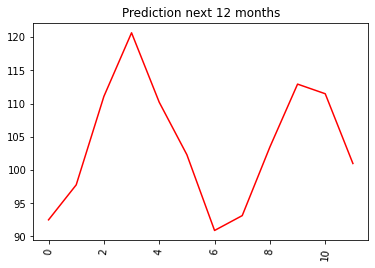

<IPython.core.display.Javascript object>

In [73]:
plt.plot(future_forecast[len(test) :], label="Prediction", color="red")
plt.xticks(rotation=85)
plt.title("Prediction next 12 months")
plt.show()

In [74]:
months = pd.date_range("2018-09-01", "2019-08-01", freq="MS")
months

DatetimeIndex(['2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq='MS')

<IPython.core.display.Javascript object>

In [75]:
new_predict = pd.DataFrame(
    {"DATE": months, "Energy Production": future_forecast[len(test) :]}
)
new_predict

,DATE,Energy Production
0,2018-09-01,92.499145
1,2018-10-01,97.762319
2,2018-11-01,111.066919
3,2018-12-01,120.638746
4,2019-01-01,110.194657
5,2019-02-01,102.293638
6,2019-03-01,90.901155
7,2019-04-01,93.136309
8,2019-05-01,103.460445
9,2019-06-01,112.918378


<IPython.core.display.Javascript object>

In [76]:
new_predict.set_index("DATE", inplace=True)
new_predict.head()

,Energy Production
DATE,
2018-09-01,92.499145
2018-10-01,97.762319
2018-11-01,111.066919
2018-12-01,120.638746
2019-01-01,110.194657


<IPython.core.display.Javascript object>

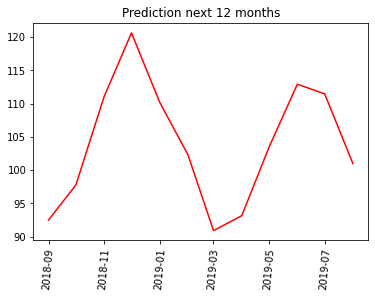

<IPython.core.display.Javascript object>

In [77]:
plt.plot(new_predict, label="Prediction", color="red")
plt.xticks(rotation=85)
plt.title("Prediction next 12 months")
plt.show()

In [79]:
"""
=> data tăng từ 2018-09 đến 2018-11, sau đó giảm tới 2019-03 và lại tăng lại, ...
"""

'\n=> data tăng từ 2018-09 đến 2018-11, sau đó giảm tới 2019-03 và lại tăng lại, ...\n'

<IPython.core.display.Javascript object>

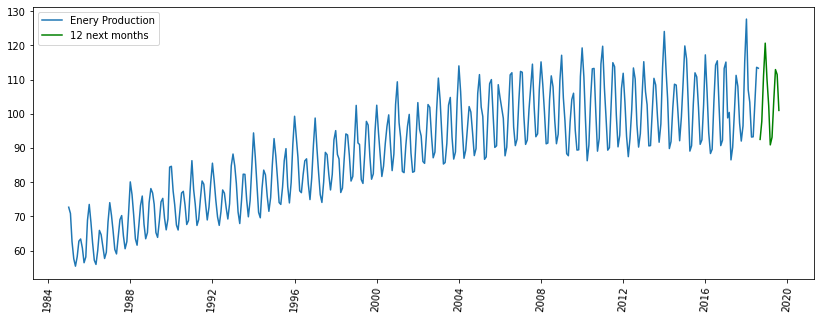

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(14, 5))
plt.plot(df_1985, label="Enery Production")
# plt.plot(future_forecast, label='Prediction', color='red')
plt.plot(new_predict, label="12 next months", color="green")
plt.xticks(rotation=85)
plt.legend()
plt.show()